#### 오픈 데이터 포털에서 제공되는 '붓꽃(iris)' 데이터의 일부를 분석 <hr>

In [2]:
import numpy as np
import pandas as pd
import math

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [3]:
# 폰트 파일의 경로 지정
font_path = r'C:\Windows\Fonts\gulim.ttc'

In [4]:
# matplotlib 패키지에 한글 폰트 설정
myFont = fm.FontProperties(fname = font_path).get_name()
mpl.rc('font', family = myFont)

In [5]:
file = '../DATA/iris_data.txt'
f = open(file, 'r')
list_of_iris = f.readlines()
#pd.DataFrame(columns = list_of_iris[0])
f.close()


In [6]:
len(list_of_iris)

151

In [7]:
list_of_iris[0].replace('\n', '')

'sepal_length,sepal_width,petal_length,petal_width,species'

In [8]:
list_of_iris[0].replace('\n', '').split(',')

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [9]:
list_of_iris[1]

'5.1,3.5,1.4,0.2,setosa\n'

In [10]:
newlist_of_iris = []
for ind in range(len(list_of_iris)):
    recode = list_of_iris[ind].replace('\n', '')
    newlist_of_iris.append(recode.split(','))

In [11]:
newlist_of_iris

[['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'],
 ['5.1', '3.5', '1.4', '0.2', 'setosa'],
 ['4.9', '3', '1.4', '0.2', 'setosa'],
 ['4.7', '3.2', '1.3', '0.2', 'setosa'],
 ['4.6', '3.1', '1.5', '0.2', 'setosa'],
 ['5', '3.6', '1.4', '0.2', 'setosa'],
 ['5.4', '3.9', '1.7', '0.4', 'setosa'],
 ['4.6', '3.4', '1.4', '0.3', 'setosa'],
 ['5', '3.4', '1.5', '0.2', 'setosa'],
 ['4.4', '2.9', '1.4', '0.2', 'setosa'],
 ['4.9', '3.1', '1.5', '0.1', 'setosa'],
 ['5.4', '3.7', '1.5', '0.2', 'setosa'],
 ['4.8', '3.4', '1.6', '0.2', 'setosa'],
 ['4.8', '3', '1.4', '0.1', 'setosa'],
 ['4.3', '3', '1.1', '0.1', 'setosa'],
 ['5.8', '4', '1.2', '0.2', 'setosa'],
 ['5.7', '4.4', '1.5', '0.4', 'setosa'],
 ['5.4', '3.9', '1.3', '0.4', 'setosa'],
 ['5.1', '3.5', '1.4', '0.3', 'setosa'],
 ['5.7', '3.8', '1.7', '0.3', 'setosa'],
 ['5.1', '3.8', '1.5', '0.3', 'setosa'],
 ['5.4', '3.4', '1.7', '0.2', 'setosa'],
 ['5.1', '3.7', '1.5', '0.4', 'setosa'],
 ['4.6', '3.6', '1', '0.2', 'setos

In [31]:
irisDF = pd.DataFrame(data = newlist_of_iris[1:], columns = newlist_of_iris[0])
irisDF.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5,3.6,1.4,0.2,setosa


In [34]:
irisDF.to_csv('../DATA/Iris.csv', index = None)

In [13]:
irisDF.shape

(150, 5)

In [14]:
irisDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   sepal_length  150 non-null    object
 1   sepal_width   150 non-null    object
 2   petal_length  150 non-null    object
 3   petal_width   150 non-null    object
 4   species       150 non-null    object
dtypes: object(5)
memory usage: 6.0+ KB


In [15]:
irisDF.columns[:4]

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [16]:
type_change = dict.fromkeys(irisDF.columns[:4], 'float')
type_change

{'sepal_length': 'float',
 'sepal_width': 'float',
 'petal_length': 'float',
 'petal_width': 'float'}

In [17]:
irisDF = irisDF.astype(type_change)
irisDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [18]:
# 공분산, 상관계수 계산을 위해 필요없는 열 삭제
irisDF2 = irisDF.drop('species', axis = 1)

In [19]:
irisDF2

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


- 4개 특성별 공분산

In [20]:
irisDF2.cov()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.685694,-0.039268,1.273682,0.516904
sepal_width,-0.039268,0.188004,-0.321713,-0.117981
petal_length,1.273682,-0.321713,3.113179,1.296387
petal_width,0.516904,-0.117981,1.296387,0.582414


- 4개 특성별 상관계수

In [21]:
irisDF2.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


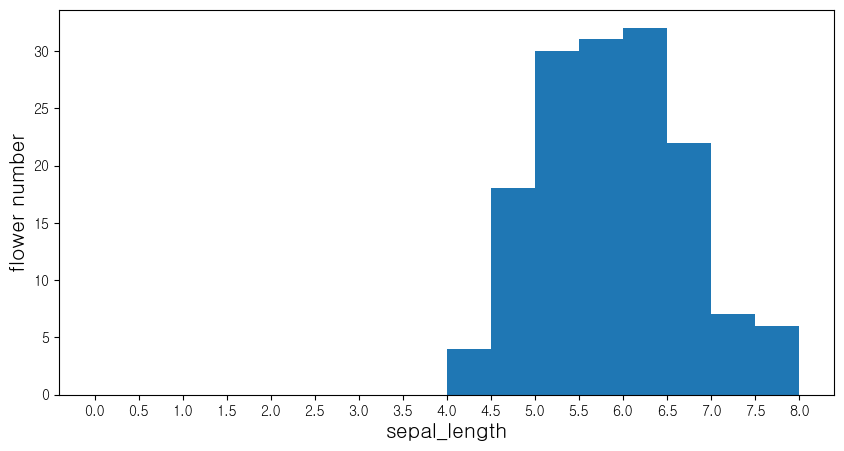

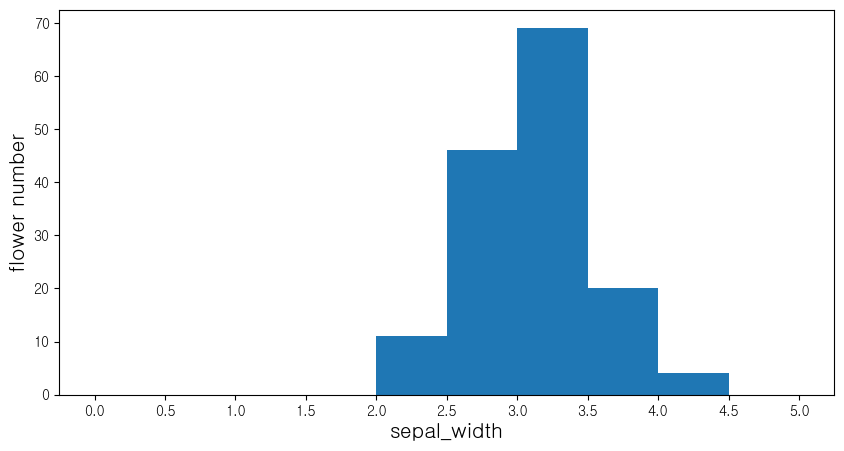

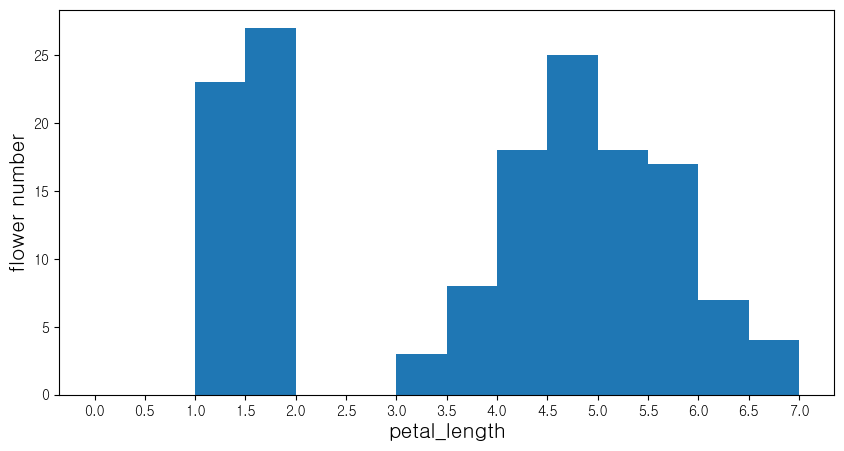

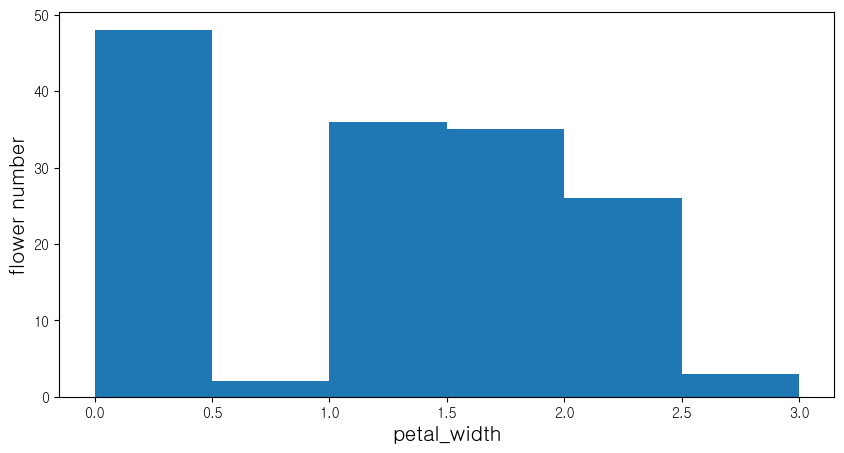

In [22]:
# 특성별 히스토그램

for ind in range(4):
    fig = plt.figure(figsize = (10, 5))
    ax = fig.add_subplot(1, 1, 1)
    count = math.floor(irisDF[irisDF.columns[ind]].max()) + 1
    freq, _, _ = ax.hist(irisDF[irisDF.columns[ind]], bins = 2*count, range = (0, count))
    ax.set_xlabel(f'{irisDF.columns[ind]}', size = 15)
    ax.set_ylabel('flower number', size = 15)
    ax.set_xticks(np.linspace(0, count, 2*count + 1))
 
plt.show()


- 특성별로 히스토그램 출력

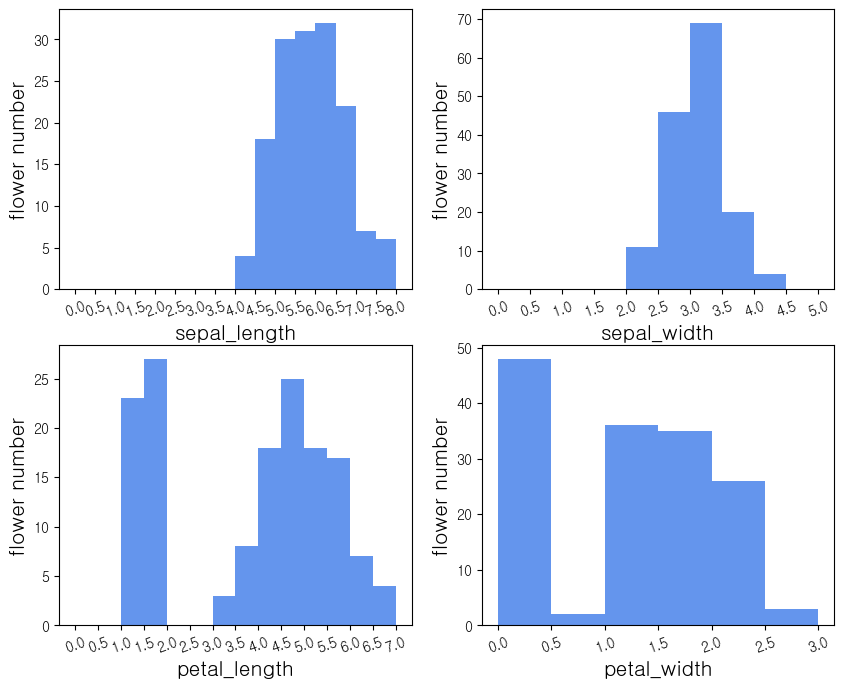

In [23]:
# plt.subplots()으로 위 결과 출력
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 8))

for ind in range(4):
    data = irisDF[irisDF.columns[ind]]
    count = math.floor(data.max()) + 1
    freq, _, _ = axes[ind // 2, ind % 2].hist(data, bins = 2*count, range = (0, count), color = 'cornflowerblue')
    axes[ind // 2, ind % 2].set_xlabel(f'{irisDF.columns[ind]}', size = 15)
    axes[ind // 2, ind % 2].set_ylabel('flower number', size = 15)
    axes[ind // 2, ind % 2].set_xticks(np.linspace(0, count, 2*count + 1))
    axes[ind // 2, ind % 2].set_xticklabels(np.linspace(0, count, 2*count + 1), rotation = 20)
plt.show()

- 품종별로 각 특성의 상자그림 출력

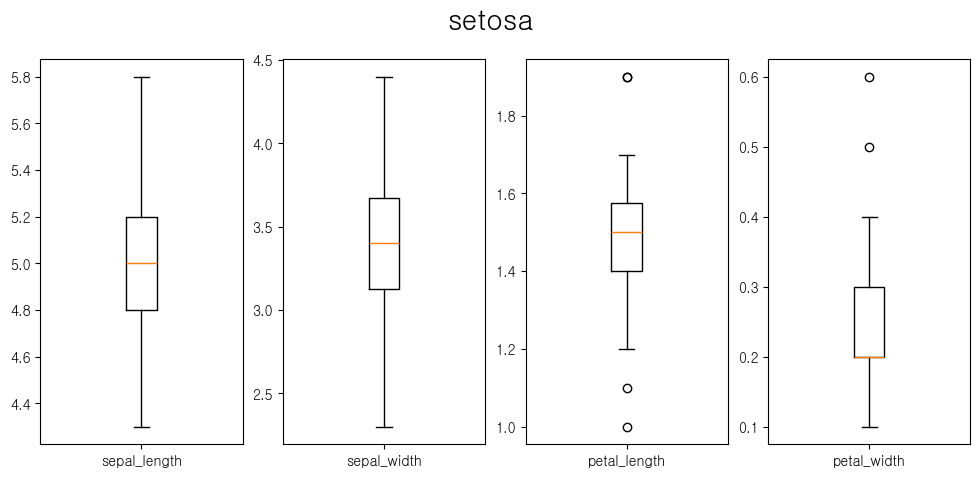

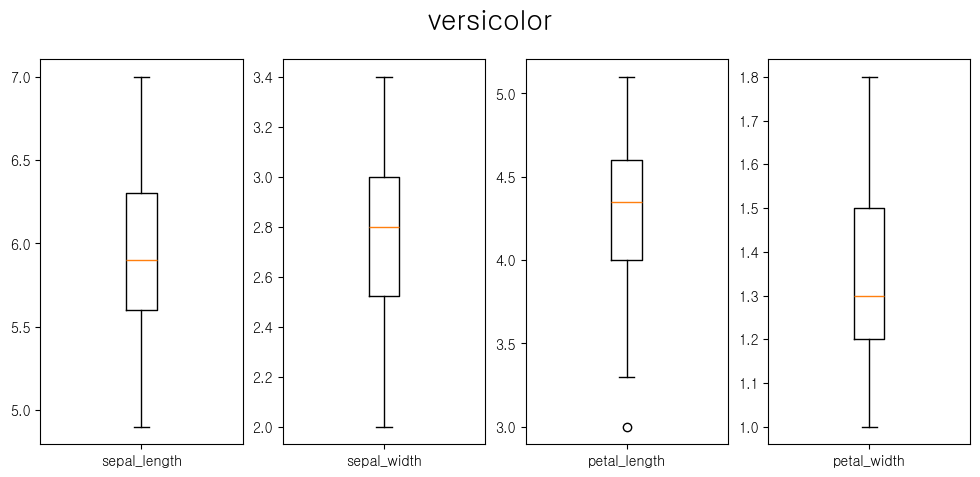

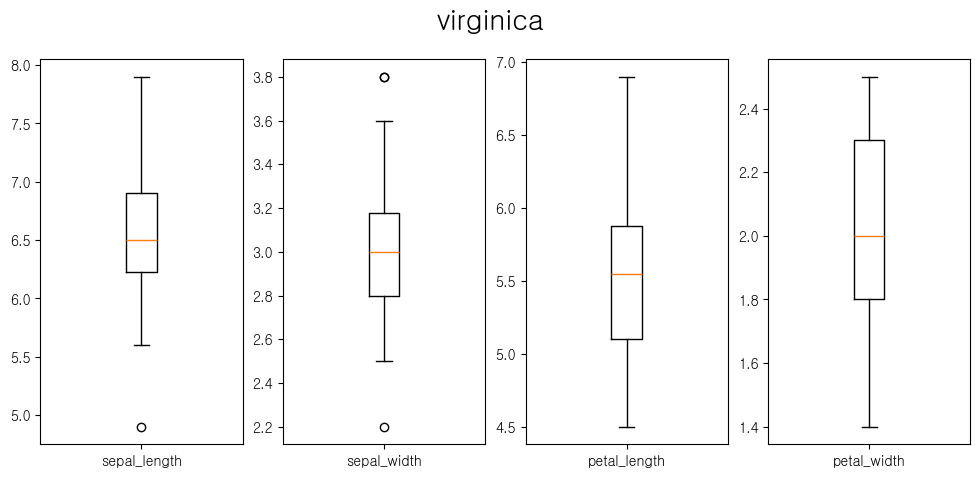

In [24]:
kinds = irisDF['species'].unique()
for kind in kinds:
    fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (12, 5))
    df = irisDF[irisDF['species'] == kind]
    fig.suptitle(f'{kind}', fontsize = 20)
    for ind in range(4):
        data = df[df.columns[ind]]
        axes[ind].boxplot(data, labels = [df.columns[ind]])
plt.show()

In [25]:
irisDF['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [26]:
irisDF.groupby('species').get_group('setosa').head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


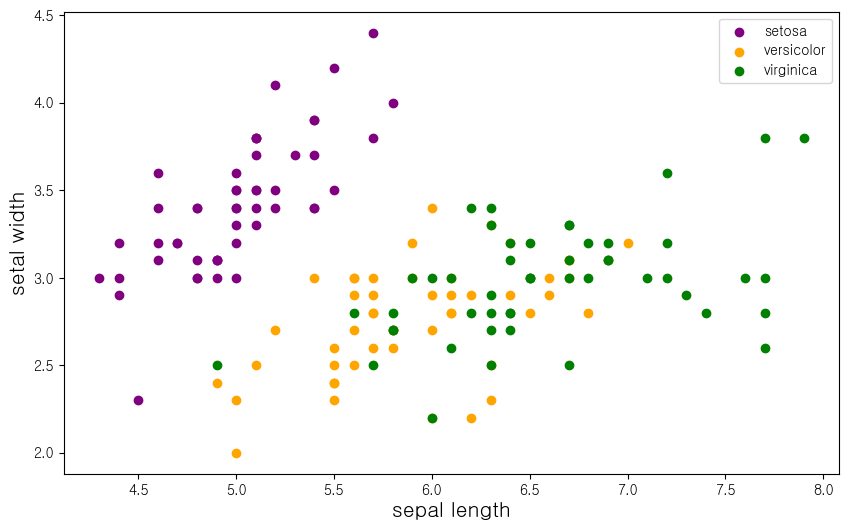

In [27]:
plt.figure(figsize = (10, 6))
color_list = ['purple', 'orange', 'green']
for ind in range(3):
    df = irisDF.groupby('species').get_group(irisDF['species'].unique()[ind])
    plt.scatter(df['sepal_length'], df['sepal_width'], color = color_list[ind], label = irisDF['species'].unique()[ind])
    plt.xlabel('sepal length', size = 15)
    plt.ylabel('setal width', size = 15)
plt.legend()
plt.show()

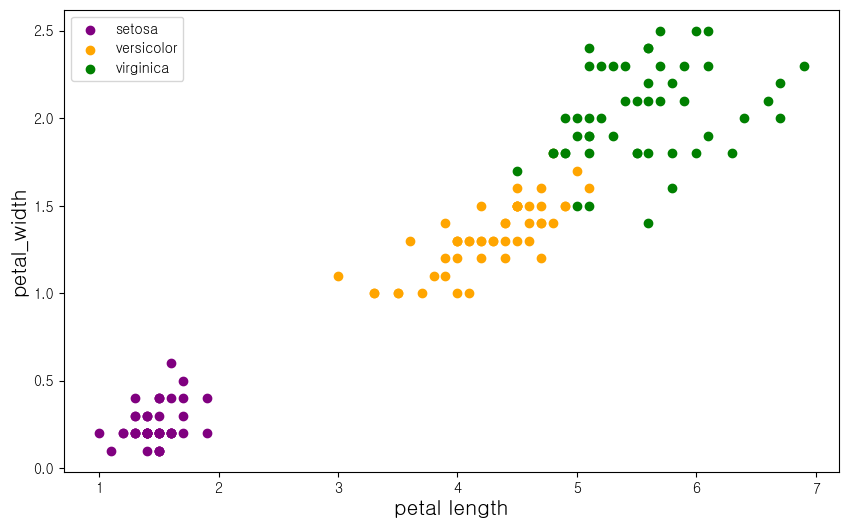

In [28]:
plt.figure(figsize = (10, 6))
color_list = ['purple', 'orange', 'green']
for ind in range(3):
    df = irisDF.groupby('species').get_group(irisDF['species'].unique()[ind])
    plt.scatter(df['petal_length'], df['petal_width'], color = color_list[ind], label = irisDF['species'].unique()[ind])
    plt.xlabel('petal length', size = 15)
    plt.ylabel('petal_width', size = 15)
plt.legend()
plt.show()

- 품종별로 꽃잎과 꽃받침 각각의 길이와 너비의 관계를 산점도로 나타내고, 색상으로 품종을 구분하여 출력

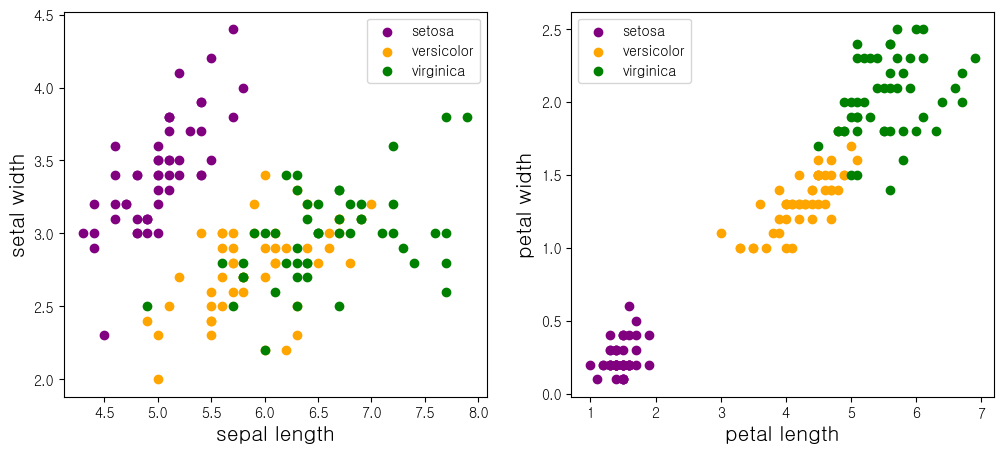

In [29]:
# plt.subplt()으로 위 두 결과 출력
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
color_list = ['purple', 'orange', 'green']
for ind in range(3):
    df = irisDF.groupby('species').get_group(irisDF['species'].unique()[ind])
    plt.scatter(df['sepal_length'], df['sepal_width'], color = color_list[ind], label = irisDF['species'].unique()[ind])
    plt.xlabel('sepal length', size = 15)
    plt.ylabel('setal width', size = 15)
plt.legend()

plt.subplot(1, 2, 2)
for ind in range(3):
    df = irisDF.groupby('species').get_group(irisDF['species'].unique()[ind])
    plt.scatter(df['petal_length'], df['petal_width'], color = color_list[ind], label = irisDF['species'].unique()[ind])
    plt.xlabel('petal length', size = 15)
    plt.ylabel('petal width', size = 15)
plt.legend()
plt.show()